In [18]:
# import libraries

options(warn=-1)     # to suppress warnings

library(readxl)
library(forecast)

In [5]:
# read main file

data = read_xls("C:/Users/Ankita/Desktop/Dissertation/M3C.xls", sheet=3)

In [6]:
data

Series,N,NF,Category,Starting Year,Starting Month,1,2,3,4,...,135,136,137,138,139,140,141,142,143,144
N1402,68,18,MICRO,1990,1,2640,2640,2160,4200,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
N1403,68,18,MICRO,1990,1,1680,1920,120,1080,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
N1404,68,18,MICRO,1990,1,1140,720,4860,1200,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
N1405,68,18,MICRO,1990,1,180,940,2040,800,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
N1406,68,18,MICRO,1990,1,2000,1550,4450,3050,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
N1407,68,18,MICRO,1990,1,1200,2850,1350,1500,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
N1408,68,18,MICRO,1990,1,1350,2400,1950,2250,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
N1409,68,18,MICRO,1990,1,2700,3600,1950,4650,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
N1410,68,18,MICRO,1990,1,3680,2600,2460,3860,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
N1411,68,18,MICRO,1990,1,4120,5020,3840,5720,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
# total no. of rows in the data

nrow(data)

[1] 1428

In [7]:
# sampling one row 

sample(1:1428, 1)

[1] 1289

In [7]:
# getting one time series

df = data[1327, ]
df

Series,N,NF,Category,Starting Year,Starting Month,1,2,3,4,...,135,136,137,138,139,140,141,142,143,144
N2728,135,18,DEMOGRAPHIC,1983,1,3080.3,3056,3119.8,3143.6,...,4569.6,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [8]:
df[1, 7:141]

1,2,3,4,5,6,7,8,9,10,...,126,127,128,129,130,131,132,133,134,135
3080.3,3056,3119.8,3143.6,3159.7,3195.9,3199.3,3203.8,3256.1,3239.9,...,4449.8,4441.1,4464.8,4544,4515.4,4558,4606.2,4512.7,4435.2,4569.6


It is checked that the length of the time series is greater than 80.

In [9]:
# converting the entire timeseries data to a ts object

tseries = t(df[1, 7:141])
data = ts(tseries[, 1], start=c(1983, 1), end=c(1994, 3), frequency=12)


In [10]:
length(data)

[1] 135

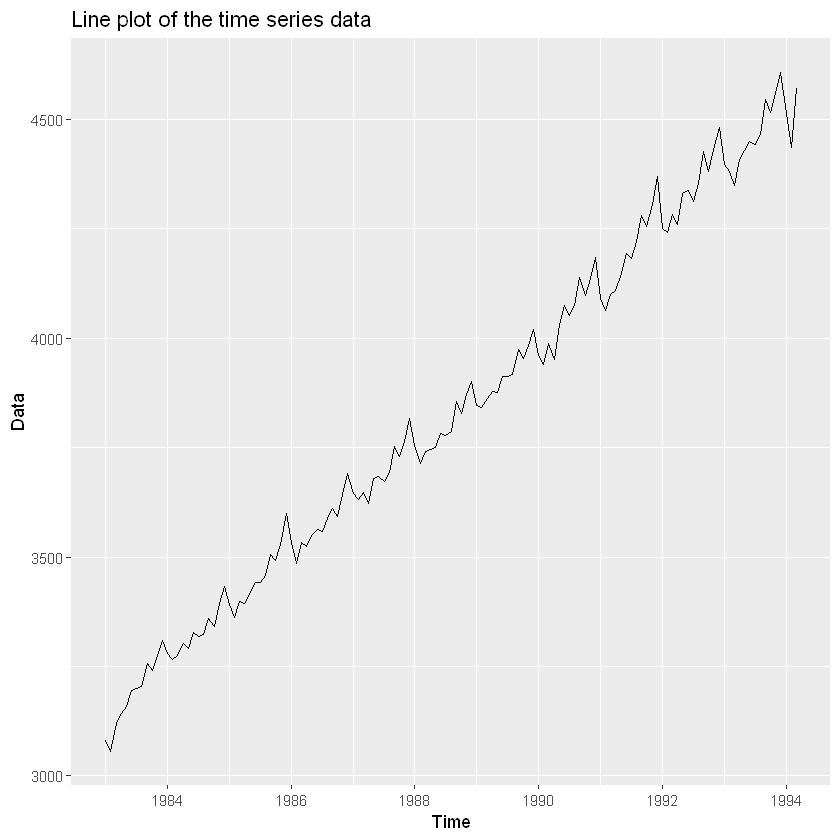

In [15]:
# a plot of the time series

autoplot(data, xlab="Time", ylab="Data", main="Line plot of the time series data")

In [16]:
d_ts = decompose(data)

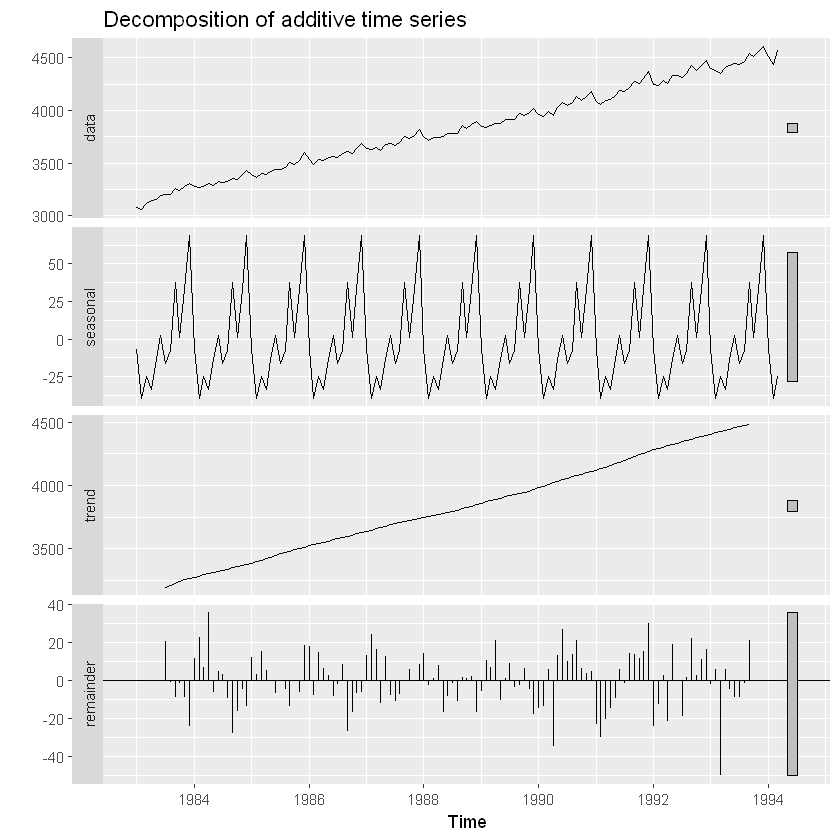

In [17]:
autoplot(d_ts)

This time series shows an increasing linear trend, is seasonal and the irregularities are random and show no definite pattern.

In [25]:
# train dataset

tseries = t(df[1, 7:123])
train = ts(tseries[, 1], start=c(1983, 1), end=c(1992, 9), frequency=12)

In [27]:
# ARIMA on the training set

ar1 = auto.arima(train)

In [28]:
ar1

Series: train 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4225  -0.5522
s.e.   0.0865   0.1048

sigma^2 estimated as 308.9:  log likelihood=-446.77
AIC=899.53   AICc=899.77   BIC=907.47

In [31]:
# predicting 18 values

pred = forecast(ar1, h=18)

In [46]:
# storing the predicted values

pred_vals = pred$mean

In [67]:
# test set

tseries = t(df[1, 124:144])
obs = ts(tseries[, 1], start=c(1992, 10), end=c(1994, 3), frequency=12)

In [69]:
length(obs)

[1] 18

In [50]:
length(pred_vals)

[1] 18

In [70]:
# making a dataframe of observed and predicted values

d_ = data.frame(pred_vals, obs)

d_

,pred_vals,obs
118,4391.777,4379.3
119,4434.989,4429.5
120,4487.398,4479.9
121,4394.131,4395.5
122,4376.153,4380.6
123,4414.481,4349.1
124,4403.065,4407.0
125,4457.468,4427.8
126,4482.415,4449.8
127,4463.892,4441.1


In [71]:
# saving the dataframe

write.csv(d_, "Output_ARIMA.csv")

In [102]:
# saving the time series data

write.csv(df, "Dataset_1.csv")